# Survey Vlaamse Meesters

## Data Import

In [1]:
import pandas as pd
import numpy as np

file="data/Onbewerkte-gegevens-24513-51204-201741010819-TH.csv"
raw_df = pd.read_csv(file, encoding = "ISO-8859-1", sep=";")
df = raw_df.copy()

## Cleaning and first glance

In [2]:
# remove strange characters from column headers
columns = list(df)
columns[40] = "8.1. Reisprogramma's op tv/radio"
columns[48] = "8.9. Officiële website van toeristische organisatie (bv. VisitBritain, VisittheUSA,...)"
columns[81] = "12.5. Interactief aanbod (virtual reality, doe-activiteiten, gebruik van touchscreens,...)"
columns[90] = "14.6. Geboortehuis, woning,... van een kunstenaar"
columns[99] = "16. Hieronder ziet u een aantal schilderijen. Kent u dit werk?"
columns[101] = "18. Kent u dit werk?"
columns[103] = "20. Kent u dit werk?"
columns[105] = "22. Kent u dit werk?"
columns[139] = "26.2. Inspiratieplekken (landschap, leefomgeving,...) van kunstenaars bezoeken/verkennen/ontdekken is interessant."
columns[142] = "26.5. Een beleving (themawandeling, doe-activiteit,...) over een kunstenaar spreekt me aan."
columns[143] = "27. Kent u de term 'Vlaamse Meesters'?"

df.columns = columns
list(df)

['Respondent',
 'Taal',
 'Datum geantwoord',
 'Distributiemethode',
 'Einde bereikt',
 'Invultijd (seconden)',
 'Browser',
 'Besturingssysteem',
 'IP',
 'Locatie (via IP)',
 'Verwijzende sites',
 '1. ID',
 '2. Country',
 '3. Study number',
 '4. Wat is uw geboortejaar?',
 '5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?',
 '6.1. Strandvakantie',
 '6.2. Stedentrip',
 '6.3. Wintersportvakantie',
 '6.4. Wandelvakantie',
 '6.5. Fietsvakantie',
 '6.6. Wellnessvakantie',
 '6.7. Gastronomische of culinaire vakantie',
 '6.8. Vakantie in het groen met (af en toe) uitstappen',
 '6.9. Rondreis',
 '6.10. Cruise',
 '6.11. Culturele reis',
 '6.12. Ander, gelieve te specificeren',
 '6.13. Geen van bovenstaande',
 '7.1. Afstand',
 '7.2. Historisch erfgoed',
 '7.3. Eten',
 '7.4. Cultuur',
 '7.5. Natuur',
 '7.6. Prijs',
 '7.7. Kust',
 '7.8. Sport',
 '7.9. Festival, evenement of tentoonstelling',
 '7.10. Kunst',
 '7.11. Variatie aan activiteiten',
 "8.1. Reisprogramma's 

In [61]:
df["Taal"] = raw_df["Taal"].astype('category')
df["Datum geantwoord"] = pd.to_datetime(raw_df.loc[:,"Datum geantwoord"], infer_datetime_format=True)
df["Distributiemethode"] = raw_df["Distributiemethode"].astype('category')
df["Browser"] = raw_df["Browser"].astype('category')
df["Besturingssysteem"] = raw_df["Besturingssysteem"].astype('category')

df.iloc[:3, 0:8]

,Respondent,Taal,Datum geantwoord,Distributiemethode,Einde bereikt,Invultijd (seconden),Browser,Besturingssysteem
0,22,nl,2015-12-16 10:17:00,Via panel provider,1,312,Google Chrome,Windows 10
1,23,nl,2015-12-16 10:29:00,Via panel provider,1,919,Firefox,Windows Vista
2,24,nl,2015-12-16 10:44:00,Via panel provider,1,154,Google Chrome,Windows 7


In [62]:
df["2. Country"] = raw_df["2. Country"].astype('category')
df.iloc[:3, 8:15]

,IP,Locatie (via IP),Verwijzende sites,1. ID,2. Country,3. Study number,4. Wat is uw geboortejaar?
0,84.31.26.69,NaN,http://www.globaltestmarket.com/survey/onsurve...,6da3a071da328d79,Netherlands,394334,1968
1,77.173.234.228,"Putte, Nederland",http://www.globaltestmarket.com/survey/onsurve...,6456a4ddd07e1021,Netherlands,394334,1981
2,89.146.11.36,"Westervoort, Nederland",http://www.globaltestmarket.com/survey/onsurve...,02e8569ecb3b5276,Netherlands,394334,1991


In [5]:
# change to boolean values

df["5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?"] = raw_df["5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?"] == 'Ja'
df["6.1. Strandvakantie"] = raw_df["6.1. Strandvakantie"] == 'Strandvakantie'
df["6.2. Stedentrip"] = raw_df["6.2. Stedentrip"] == 'Stedentrip'
df["6.3. Wintersportvakantie"] = raw_df["6.3. Wintersportvakantie"] == 'Wintersportvakantie'
df["6.4. Wandelvakantie"] = raw_df["6.4. Wandelvakantie"] == 'Wandelvakantie'
df["6.5. Fietsvakantie"] = raw_df["6.5. Fietsvakantie"] == 'Fietsvakantie'
df["6.6. Wellnessvakantie"] = raw_df["6.6. Wellnessvakantie"] == 'Wellnessvakantie'
df["6.7. Gastronomische of culinaire vakantie"] = raw_df["6.7. Gastronomische of culinaire vakantie"] == 'Gastronomische of culinaire vakantie'
df["6.8. Vakantie in het groen met (af en toe) uitstappen"] = raw_df["6.8. Vakantie in het groen met (af en toe) uitstappen"] == 'Vakantie in het groen met (af en toe) uitstappen'
df["6.9. Rondreis"] = raw_df["6.9. Rondreis"] == 'Rondreis'
df["6.10. Cruise"] = raw_df["6.10. Cruise"] == 'Cruise'
df["6.11. Culturele reis"] = raw_df["6.11. Culturele reis"] == 'Culturele reis'
df["6.13. Geen van bovenstaande"] = raw_df["6.13. Geen van bovenstaande"] == 'Geen van bovenstaande'
df.iloc[:3, 15:29]


,5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?,6.1. Strandvakantie,6.2. Stedentrip,6.3. Wintersportvakantie,6.4. Wandelvakantie,6.5. Fietsvakantie,6.6. Wellnessvakantie,6.7. Gastronomische of culinaire vakantie,6.8. Vakantie in het groen met (af en toe) uitstappen,6.9. Rondreis,6.10. Cruise,6.11. Culturele reis,"6.12. Ander, gelieve te specificeren",6.13. Geen van bovenstaande
0,True,False,False,False,False,False,False,False,True,False,False,False,NaN,False
1,True,True,False,False,True,False,False,False,False,True,False,False,NaN,False
2,True,True,False,False,False,False,False,False,False,False,False,False,NaN,False


In [6]:
(df.iloc[:, 15:29].mean()).sort_values(ascending = False)

5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?    0.999941
6.1. Strandvakantie                                                                   0.595824
6.2. Stedentrip                                                                       0.536882
6.11. Culturele reis                                                                  0.229529
6.9. Rondreis                                                                         0.220471
6.8. Vakantie in het groen met (af en toe) uitstappen                                 0.198529
6.6. Wellnessvakantie                                                                 0.149529
6.4. Wandelvakantie                                                                   0.137176
6.10. Cruise                                                                          0.136941
6.3. Wintersportvakantie                                                              0.112000
6.7. Gastronomische of culinaire vakantie         

In [7]:
df["6.12. Ander, gelieve te specificeren"].dropna().unique()

array(['familiebezoek', 'familie bezoek', 'Bezoek vrienden', ...,
       'Disney e Universal', '???????????', 'meeting relatives'], dtype=object)

In [8]:
df["7.1. Afstand"] = raw_df["7.1. Afstand"] == 'Afstand'
df["7.2. Historisch erfgoed"] = raw_df["7.2. Historisch erfgoed"] == 'Historisch erfgoed'
df["7.3. Eten"] = raw_df["7.3. Eten"] == 'Eten'
df["7.4. Cultuur"] = raw_df["7.4. Cultuur"] == 'Cultuur'
df["7.5. Natuur"] = raw_df["7.5. Natuur"] == 'Natuur'
df["7.6. Prijs"] = raw_df["7.6. Prijs"] == 'Prijs'
df["7.7. Kust"] = raw_df["7.7. Kust"] == 'Kust'
df["7.8. Sport"] = raw_df["7.8. Sport"] == 'Sport'
df["7.9. Festival, evenement of tentoonstelling"] = raw_df["7.9. Festival, evenement of tentoonstelling"] == 'Festival, evenement of tentoonstelling'
df["7.10. Kunst"] = raw_df["7.10. Kunst"] == 'Kunst'
df["7.11. Variatie aan activiteiten"] = raw_df["7.11. Variatie aan activiteiten"] == 'Variatie aan activiteiten'

df.iloc[:3, 29:40]

,7.1. Afstand,7.2. Historisch erfgoed,7.3. Eten,7.4. Cultuur,7.5. Natuur,7.6. Prijs,7.7. Kust,7.8. Sport,"7.9. Festival, evenement of tentoonstelling",7.10. Kunst,7.11. Variatie aan activiteiten
0,True,False,False,False,True,True,False,False,False,False,False
1,False,False,True,False,False,False,True,False,True,False,False
2,True,False,False,False,False,True,True,False,False,False,False


In [9]:
(df.iloc[:, 29:40].mean()).sort_values(ascending = False)

7.6. Prijs                                     0.568941
7.4. Cultuur                                   0.448412
7.5. Natuur                                    0.406941
7.3. Eten                                      0.396412
7.2. Historisch erfgoed                        0.340118
7.7. Kust                                      0.250529
7.1. Afstand                                   0.234882
7.11. Variatie aan activiteiten                0.189118
7.9. Festival, evenement of tentoonstelling    0.065882
7.10. Kunst                                    0.049706
7.8. Sport                                     0.049059
dtype: float64

In [10]:
df["8.1. Reisprogramma's op tv/radio"] = pd.Categorical(raw_df.iloc[:,40], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.2. Websites van (online) touroperators / reisagenten"] = pd.Categorical(raw_df["8.2. Websites van (online) touroperators / reisagenten"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.4. Websites met beoordelingen/reviews van reizigers"] = pd.Categorical(raw_df["8.4. Websites met beoordelingen/reviews van reizigers"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.5. Reismagazines"] = pd.Categorical(raw_df["8.5. Reismagazines"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.6. Vrienden, familie en kennissen"] = pd.Categorical(raw_df["8.6. Vrienden, familie en kennissen"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.7. Reisbijlages/ - artikelen in kranten"] = pd.Categorical(raw_df["8.7. Reisbijlages/ - artikelen in kranten"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.8. Cultuurmagazines"] = pd.Categorical(raw_df["8.8. Cultuurmagazines"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.9. Officiële website van toeristische organisatie (bv. VisitBritain, VisittheUSA,...)"] = pd.Categorical(raw_df.iloc[:,48], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)
df["8.10. Sociale media"] = pd.Categorical(raw_df["8.10. Sociale media"], 
            categories=['Nooit', 'Af en toe', 'Regelmatig', 'Vaak'],
            ordered=True)

df.iloc[:3, 40:50]

,8.1. Reisprogramma's op tv/radio,8.2. Websites van (online) touroperators / reisagenten,8.3. Websites waarop consumenten reiservaringen en verhalen delen/uitwisselen (reisblogs),8.4. Websites met beoordelingen/reviews van reizigers,8.5. Reismagazines,"8.6. Vrienden, familie en kennissen",8.7. Reisbijlages/ - artikelen in kranten,8.8. Cultuurmagazines,"8.9. Officiële website van toeristische organisatie (bv. VisitBritain, VisittheUSA,...)",8.10. Sociale media
0,Nooit,Nooit,Nooit,Nooit,Nooit,Af en toe,Nooit,Nooit,Nooit,Nooit
1,Regelmatig,Regelmatig,Af en toe,Af en toe,Af en toe,Regelmatig,Af en toe,Af en toe,Af en toe,Regelmatig
2,Nooit,Vaak,Vaak,Vaak,Af en toe,Regelmatig,Af en toe,Af en toe,Af en toe,Af en toe


In [11]:
df["9.1. Facebook"] = raw_df["9.1. Facebook"] == 'Facebook'
df["9.2. Twitter"] = raw_df["9.2. Twitter"] == 'Twitter'
df["9.3. Youtube"] = raw_df["9.3. Youtube"] == 'Youtube'
df["9.4. Pinterest"] = raw_df["9.4. Pinterest"] == 'Pinterest'
df["9.5. Instagram"] = raw_df["9.5. Instagram"] == 'Instagram'
df["9.6. LinkedIn"] = raw_df["9.6. LinkedIn"] == 'LinkedIn'
df["9.7. Google+"] = raw_df["9.7. Google+"] == 'Google+'
df["9.8. Flickr"] = raw_df["9.8. Flickr"] == 'Flickr'
df["9.9. Tumblr"] = raw_df["9.9. Tumblr"] == 'Tumblr'
df["9.10. Vine"] = raw_df["9.10. Vine"] == 'Vine'
df["9.11. Snapchat"] = raw_df["9.11. Snapchat"] == 'Snapchat'
df["9.12. Whatsapp"] = raw_df["9.12. Whatsapp"] == 'Whatsapp'
df["9.13. Foursquare"] = raw_df["9.13. Foursquare"] == 'Foursquare'
df["9.14. Orkut"] = raw_df["9.14. Orkut"] == 'Orkut'
df["9.15. Weibo"] = raw_df["9.15. Weibo"] == 'Weibo'
df["9.16. We Chat"] = raw_df["9.16. We Chat"] == 'We Chat'
df["9.17. VKontakte"] = raw_df["9.17. VKontakte"] == 'VKontakte'
df["9.19. Ik gebruik geen sociale media"] = raw_df["9.19. Ik gebruik geen sociale media"] == 'Ik gebruik geen sociale media'
df.iloc[:3, 50:69]

,9.1. Facebook,9.2. Twitter,9.3. Youtube,9.4. Pinterest,9.5. Instagram,9.6. LinkedIn,9.7. Google+,9.8. Flickr,9.9. Tumblr,9.10. Vine,9.11. Snapchat,9.12. Whatsapp,9.13. Foursquare,9.14. Orkut,9.15. Weibo,9.16. We Chat,9.17. VKontakte,"9.18. Ander, gelieve te specificeren",9.19. Ik gebruik geen sociale media
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True
1,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,NaN,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False


In [12]:
(df.iloc[:, 50:69].mean()).sort_values(ascending = False)

9.1. Facebook                          0.664176
9.3. Youtube                           0.367353
9.12. Whatsapp                         0.317647
9.7. Google+                           0.223118
9.2. Twitter                           0.204882
9.5. Instagram                         0.190647
9.19. Ik gebruik geen sociale media    0.134706
9.6. LinkedIn                          0.104176
9.11. Snapchat                         0.074588
9.16. We Chat                          0.071294
9.4. Pinterest                         0.065588
9.15. Weibo                            0.046235
9.17. VKontakte                        0.046000
9.9. Tumblr                            0.028882
9.8. Flickr                            0.024353
9.13. Foursquare                       0.019824
9.10. Vine                             0.019765
9.14. Orkut                            0.013118
dtype: float64

In [13]:
df["10.1. In eigen land"] = pd.Categorical(raw_df["10.1. In eigen land"], 
            categories=['Nooit', 'Zelden', 'Af en toe (een keer per jaar)', 'Regelmatig (meerdere keren per jaar)', 'Vaak (maandelijks)'],
            ordered=True)
df["10.2. In buitenland"] = pd.Categorical(raw_df["10.2. In buitenland"], 
            categories=['Nooit', 'Zelden', 'Af en toe (een keer per jaar)', 'Regelmatig (meerdere keren per jaar)', 'Vaak (maandelijks)'],
            ordered=True)
df.iloc[:3, 69:71]

,10.1. In eigen land,10.2. In buitenland
0,Zelden,Nooit
1,Af en toe (een keer per jaar),Af en toe (een keer per jaar)
2,Zelden,Zelden


In [14]:
df["11.1. Museum voor oude of schone kunsten"] = raw_df["11.1. Museum voor oude of schone kunsten"] == 'Museum voor oude of schone kunsten'
df["11.2. Museum voor hedendaagse of actuele kunst"] = raw_df["11.2. Museum voor hedendaagse of actuele kunst"] == 'Museum voor hedendaagse of actuele kunst'
df["11.3. Museum voor natuurkunde, technologie of wetenschap"] = raw_df["11.3. Museum voor natuurkunde, technologie of wetenschap"] == 'Museum voor natuurkunde, technologie of wetenschap'
df["11.4. Museum voor geschiedenis, volkskunde of archeologie"] = raw_df["11.4. Museum voor geschiedenis, volkskunde of archeologie"] == 'Museum voor geschiedenis, volkskunde of archeologie'
df["11.5. Museum voor toegepaste kunst, mode, diamant, design, strips"] = raw_df["11.5. Museum voor toegepaste kunst, mode, diamant, design, strips"] == 'Museum voor toegepaste kunst, mode, diamant, design, strips'
df["11.6. Geen van bovenstaande"] = raw_df["11.6. Geen van bovenstaande"] == 'Geen van bovenstaande'

df.iloc[:3, 71:77]

,11.1. Museum voor oude of schone kunsten,11.2. Museum voor hedendaagse of actuele kunst,"11.3. Museum voor natuurkunde, technologie of wetenschap","11.4. Museum voor geschiedenis, volkskunde of archeologie","11.5. Museum voor toegepaste kunst, mode, diamant, design, strips",11.6. Geen van bovenstaande
0,False,False,False,False,False,False
1,False,False,True,True,False,False
2,False,False,False,False,False,True


In [15]:
(df.iloc[:, 71:77].mean()).sort_values(ascending = False)

11.4. Museum voor geschiedenis, volkskunde of archeologie            0.578294
11.1. Museum voor oude of schone kunsten                             0.473059
11.3. Museum voor natuurkunde, technologie of wetenschap             0.416647
11.2. Museum voor hedendaagse of actuele kunst                       0.359235
11.5. Museum voor toegepaste kunst, mode, diamant, design, strips    0.220118
11.6. Geen van bovenstaande                                          0.049235
dtype: float64

In [16]:
df.iloc[:3, 77:84]

,12.1. Aanbod in eigen taal,12.2. Aanwezigheid van topwerken,12.3. Gidsen en gegidste rondleidingen,12.4. Audioguide/apps,"12.5. Interactief aanbod (virtual reality, doe-activiteiten, gebruik van touchscreens,...)",12.6. Aanbod voor kinderen,12.7. Museumshop
0,1.0,3.0,2.0,7.0,5.0,4.0,6.0
1,4.0,1.0,5.0,3.0,2.0,7.0,6.0
2,2.0,1.0,5.0,4.0,3.0,6.0,7.0


In [17]:
(df.iloc[:,  77:84].mean()).sort_values(ascending = True)

12.2. Aanwezigheid van topwerken                                                              2.682159
12.1. Aanbod in eigen taal                                                                    2.754345
12.3. Gidsen en gegidste rondleidingen                                                        3.076832
12.5. Interactief aanbod (virtual reality, doe-activiteiten, gebruik van touchscreens,...)    3.728192
12.4. Audioguide/apps                                                                         3.895251
12.6. Aanbod voor kinderen                                                                    5.446461
12.7. Museumshop                                                                              5.500746
dtype: float64

In [18]:
df["13. Als u op reis bent naar het buitenland, bezoekt u dan soms plaatsen of evenementen gelinkt aan kunst en cultuur?"] = pd.Categorical(raw_df["13. Als u op reis bent naar het buitenland, bezoekt u dan soms plaatsen of evenementen gelinkt aan kunst en cultuur?"], 
            categories=['Nee', 'Ja, maar enkel bij toeval', 'Ja, soms is het zelfs een onderdeel van een reis, maar nooit een hoofdthema', 'Ja, soms zelfs als hoofdthema'],
            ordered=True)
df.iloc[:3, 84:85]


,"13. Als u op reis bent naar het buitenland, bezoekt u dan soms plaatsen of evenementen gelinkt aan kunst en cultuur?"
0,Nee
1,"Ja, soms is het zelfs een onderdeel van een re..."
2,"Ja, soms is het zelfs een onderdeel van een re..."


In [19]:
df["14.1. Musea met kunstcollectie"] = raw_df["14.1. Musea met kunstcollectie"] == 'Musea met kunstcollectie'
df["14.2. Kunstgalerijen"] = raw_df["14.2. Kunstgalerijen"] == 'Kunstgalerijen'
df["14.3. Historische gebouwen"] = raw_df["14.3. Historische gebouwen"] == 'Historische gebouwen'
df["14.5. Tentoonstelling"] = raw_df["14.5. Tentoonstelling"] == 'Tentoonstelling'
df["14.6. Geboortehuis, woning,... van een kunstenaar"] = raw_df.iloc[:,90] == 'Geboortehuis, woning,... van een kunstenaar'
df["14.7. Routes en rondleidingen"] = raw_df["14.7. Routes en rondleidingen"] == 'Routes en rondleidingen'
df["14.8. Evenementen"] = raw_df["14.8. Evenementen"] == 'Evenementen'
df["14.9. Geen van bovenstaande"] = raw_df["14.9. Geen van bovenstaande"] == 'Geen van bovenstaande'

df.iloc[:3, 85:94]

,14.1. Musea met kunstcollectie,14.2. Kunstgalerijen,14.3. Historische gebouwen,"14.4. Kerken, kathedralen",14.5. Tentoonstelling,"14.6. Geboortehuis, woning,... van een kunstenaar",14.7. Routes en rondleidingen,14.8. Evenementen,14.9. Geen van bovenstaande
0,False,False,False,NaN,False,False,False,False,False
1,False,False,True,"Kerken, kathedralen",False,False,True,False,False
2,False,False,False,NaN,False,False,False,False,True


In [20]:
(df.iloc[:, 71:77].mean()).sort_values(ascending = False)

11.4. Museum voor geschiedenis, volkskunde of archeologie            0.578294
11.1. Museum voor oude of schone kunsten                             0.473059
11.3. Museum voor natuurkunde, technologie of wetenschap             0.416647
11.2. Museum voor hedendaagse of actuele kunst                       0.359235
11.5. Museum voor toegepaste kunst, mode, diamant, design, strips    0.220118
11.6. Geen van bovenstaande                                          0.049235
dtype: float64

In [21]:
df.iloc[:10, 94:99]

,15.1. 1,15.2. 2,15.3. 3,15.4. 4,15.5. 5
0,rembrandt,van gogh,NaN,NaN,NaN
1,van gogh,paul cezanne,caravaggio,botticelli,del sarto
2,geen idee,NaN,NaN,NaN,NaN
3,van gogh,rembrandt,leonardo da vinci,NaN,NaN
4,Rembrandt,van Gogh,Picasso,Vermeer,Mondriaan
5,Van gogh,Vermeer,Rembrant,NaN,NaN
6,rembrandt,steen,van gogh,picasso,jeroen bosch
7,van gogh,dali,rembrandt,NaN,NaN
8,rembrant,van gogh,monet,dali,rubens
9,repin,rembrand,ayvazovski,saryan,elibekyan


In [22]:
df["16. Hieronder ziet u een aantal schilderijen. Kent u dit werk?"] = raw_df.iloc[:,99] == 'Ja'
df["18. Kent u dit werk?"] = raw_df.iloc[:,99] == 'Ja'
df["20. Kent u dit werk?"] = raw_df.iloc[:,101] == 'Ja'
df["22. Kent u dit werk?"] = raw_df.iloc[:,103] == 'Ja'

df.iloc[:3, 99:107]

,16. Hieronder ziet u een aantal schilderijen. Kent u dit werk?,17. Wie is de schilder?,18. Kent u dit werk?,19. Wie is de schilder?,20. Kent u dit werk?,21. Wie is de schilder?,22. Kent u dit werk?,23. Wie is de schilder?
0,True,Rembrandt van Rijn,True,NaN,False,NaN,False,?
1,True,rembrandt,True,vergeten,True,rembrandt,True,pieter bruegel
2,True,van gogh,True,NaN,False,NaN,True,NaN


In [23]:
(df.iloc[:, 99:107].mean()).sort_values(ascending = False)

18. Kent u dit werk?                                              0.419941
16. Hieronder ziet u een aantal schilderijen. Kent u dit werk?    0.419941
22. Kent u dit werk?                                              0.407176
20. Kent u dit werk?                                              0.234588
dtype: float64

In [24]:
df["24.1. Albrecht Dürer"] = raw_df["24.1. Albrecht Dürer"] == 'Albrecht Dürer'
df["24.2. Antoon van Dyck"] = raw_df["24.2. Antoon van Dyck"] == 'Antoon van Dyck'
df["24.3. Dirk Bouts"] = raw_df["24.3. Dirk Bouts"] == 'Dirk Bouts'
df["24.4. Hans Memling"] = raw_df["24.4. Hans Memling"] == 'Hans Memling'
df["24.5. Jacob Jordaens"] = raw_df["24.5. Jacob Jordaens"] == 'Jacob Jordaens'
df["24.6. Jan van Eyck"] = raw_df["24.6. Jan van Eyck"] == 'Jan van Eyck'
df["24.7. Paul Cézanne"] = raw_df["24.7. Paul Cézanne"] == 'Paul Cézanne'
df["24.8. Pieter Paul Rubens"] = raw_df["24.8. Pieter Paul Rubens"] == 'Pieter Paul Rubens'
df["24.9. Pieter Bruegel de Oude"] = raw_df["24.9. Pieter Bruegel de Oude"] == 'Pieter Bruegel de Oude'
df["24.10. Rembrandt van Rijn"] = raw_df["24.10. Rembrandt van Rijn"] == 'Rembrandt van Rijn'
df["24.11. René Magritte"] = raw_df["24.11. René Magritte"] == 'René Magritte'
df["24.12. Rogier van der Weyden"] = raw_df["24.12. Rogier van der Weyden"] == 'Rogier van der Weyden'
df["24.13. Jeroen Bosch"] = raw_df["24.13. Jeroen Bosch"] == 'Jeroen Bosch'
df["24.14. Vincent van Gogh"] = raw_df["24.14. Vincent van Gogh"] == 'Vincent van Gogh'
df["24.15. James Ensor"] = raw_df["24.15. James Ensor"] == 'James Ensor'
df["24.16. William Turner"] = raw_df["24.16. William Turner"] == 'William Turner'
df.iloc[:3, 107:125]


,24.1. Albrecht Dürer,24.2. Antoon van Dyck,24.3. Dirk Bouts,24.4. Hans Memling,24.5. Jacob Jordaens,24.6. Jan van Eyck,24.7. Paul Cézanne,24.8. Pieter Paul Rubens,24.9. Pieter Bruegel de Oude,24.10. Rembrandt van Rijn,24.11. René Magritte,24.12. Rogier van der Weyden,24.13. Jeroen Bosch,24.14. Vincent van Gogh,24.15. James Ensor,24.16. William Turner,24.17. Vlaamse Primitieven,24.18. Geen van bovenstaande
0,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,NaN,NaN
1,True,True,False,True,False,True,True,True,True,True,False,True,True,True,False,False,NaN,NaN
2,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN


In [25]:
(df.iloc[:, 107:125].mean()).sort_values(ascending = False)

24.14. Vincent van Gogh         0.793647
24.10. Rembrandt van Rijn       0.595412
24.7. Paul Cézanne              0.459412
24.8. Pieter Paul Rubens        0.433235
24.1. Albrecht Dürer            0.268706
24.16. William Turner           0.221235
24.11. René Magritte            0.220118
24.2. Antoon van Dyck           0.203882
24.6. Jan van Eyck              0.198882
24.9. Pieter Bruegel de Oude    0.157824
24.13. Jeroen Bosch             0.142118
24.5. Jacob Jordaens            0.066529
24.12. Rogier van der Weyden    0.064353
24.4. Hans Memling              0.059471
24.3. Dirk Bouts                0.045588
24.15. James Ensor              0.044353
dtype: float64

In [26]:
df["25.1. Anish Kapoor"] = raw_df["25.1. Anish Kapoor"] == 'Anish Kapoor'
df["25.2. Axel Vervoordt"] = raw_df["25.2. Axel Vervoordt"] == 'Axel Vervoordt'
df["25.3. Michaël Borremans"] = raw_df["25.3. Michaël Borremans"] == 'Michaël Borremans'
df["25.4. Damien Hirst"] = raw_df["25.4. Damien Hirst"] == 'Damien Hirst'
df["25.5. Daniël Ost"] = raw_df["25.5. Daniël Ost"] == 'Daniël Ost'
df["25.6. Jan De Cock"] = raw_df["25.6. Jan De Cock"] == 'Jan De Cock'
df["25.7. Wim Delvoye"] = raw_df["25.7. Wim Delvoye"] == 'Wim Delvoye'
df["25.8. Jan Fabre"] = raw_df["25.8. Jan Fabre"] == 'Jan Fabre'
df["25.9. Luc Tuymans"] = raw_df["25.9. Luc Tuymans"] == 'Luc Tuymans'
df["25.10. Marlene Dumas"] = raw_df["25.10. Marlene Dumas"] == 'Marlene Dumas'
df["25.11. Ai Wei Wei"] = raw_df["25.11. Ai Wei Wei"] == 'Ai Wei Wei'
df["25.12. Panamarenko"] = raw_df["25.12. Panamarenko"] == 'Panamarenko'
df["25.13. Geen van bovenstaande"] = raw_df["25.13. Geen van bovenstaande"] == 'Geen van bovenstaande'
df.iloc[:3, 125:138]

,25.1. Anish Kapoor,25.2. Axel Vervoordt,25.3. Michaël Borremans,25.4. Damien Hirst,25.5. Daniël Ost,25.6. Jan De Cock,25.7. Wim Delvoye,25.8. Jan Fabre,25.9. Luc Tuymans,25.10. Marlene Dumas,25.11. Ai Wei Wei,25.12. Panamarenko,25.13. Geen van bovenstaande
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True


In [27]:
(df.iloc[:, 125:138].mean()).sort_values(ascending = False)

25.13. Geen van bovenstaande    0.601353
25.4. Damien Hirst              0.141412
25.11. Ai Wei Wei               0.107941
25.10. Marlene Dumas            0.100176
25.1. Anish Kapoor              0.095235
25.8. Jan Fabre                 0.085294
25.6. Jan De Cock               0.079176
25.3. Michaël Borremans         0.070118
25.5. Daniël Ost                0.063118
25.2. Axel Vervoordt            0.061235
25.9. Luc Tuymans               0.048059
25.7. Wim Delvoye               0.046176
25.12. Panamarenko              0.030882
dtype: float64

In [28]:
df["26.1. Een museum met een focus op topwerken boeit mij."] = pd.Categorical(raw_df.iloc[:,138], 
            categories=['NVT', 'Helemaal oneens','Eerder oneens', 'Eerder eens','Helemaal eens'],
            ordered=True)
df["26.2. Inspiratieplekken (landschap, leefomgeving,...) van kunstenaars bezoeken/verkennen/ontdekken is interessant."] = pd.Categorical(raw_df.iloc[:,139], 
            categories=['NVT', 'Helemaal oneens','Eerder oneens', 'Eerder eens','Helemaal eens'],
            ordered=True)
df["26.3. Ik bezoek enkel een museum met de collectie van een kunstenaar die ik ken."] = pd.Categorical(raw_df.iloc[:,140], 
            categories=['NVT', 'Helemaal oneens','Eerder oneens', 'Eerder eens','Helemaal eens'],
            ordered=True)
df["26.4. Interpretaties van oude werken door hedendaagse kunstenaars zijn interessant."] = pd.Categorical(raw_df.iloc[:,141], 
            categories=['NVT', 'Helemaal oneens','Eerder oneens', 'Eerder eens','Helemaal eens'],
            ordered=True)
df["26.5. Een beleving (themawandeling, doe-activiteit,...) over een kunstenaar spreekt me aan."] = pd.Categorical(raw_df.iloc[:,142], 
            categories=['NVT', 'Helemaal oneens','Eerder oneens', 'Eerder eens','Helemaal eens'],
            ordered=True)

df.iloc[:10, 138:143]

,26.1. Een museum met een focus op topwerken boeit mij.,"26.2. Inspiratieplekken (landschap, leefomgeving,...) van kunstenaars bezoeken/verkennen/ontdekken is interessant.",26.3. Ik bezoek enkel een museum met de collectie van een kunstenaar die ik ken.,26.4. Interpretaties van oude werken door hedendaagse kunstenaars zijn interessant.,"26.5. Een beleving (themawandeling, doe-activiteit,...) over een kunstenaar spreekt me aan."
0,NVT,NVT,NVT,NVT,NVT
1,Eerder eens,Eerder eens,Eerder eens,Eerder eens,Eerder eens
2,Helemaal eens,Eerder eens,Eerder eens,Eerder eens,Eerder eens
3,Eerder eens,Eerder eens,Eerder oneens,Eerder oneens,Eerder eens
4,Eerder eens,Eerder oneens,Helemaal eens,Eerder eens,Eerder eens
5,Eerder eens,Eerder eens,NVT,Helemaal eens,Eerder oneens
6,Helemaal eens,Eerder eens,Eerder oneens,Eerder eens,Eerder oneens
7,NVT,NVT,NVT,NVT,NVT
8,NVT,NVT,NVT,NVT,NVT
9,Eerder eens,Helemaal oneens,Eerder oneens,Eerder oneens,Eerder oneens


In [29]:
df["27. Kent u de term 'Vlaamse Meesters'?"] = raw_df.iloc[:,143] == 'Ja'
df.iloc[:3, 143:145]

,27. Kent u de term 'Vlaamse Meesters'?,28. Omschrijf met een aantal kernwoorden wat u onder het begrip 'Vlaamse meesters' begrijpt?
0,False,NaN
1,True,de schilders uit vlaamse belgie
2,False,NaN


In [30]:
(df.iloc[:, 143:144].mean()).sort_values(ascending = False)

27. Kent u de term 'Vlaamse Meesters'?    0.501471
dtype: float64

In [31]:
df.iloc[:3, 145:148]

,29.1. 1,29.2. 2,29.3. 3
0,?,NaN,NaN
1,Pieter Brueghel,Peter Paul Rubens,Jacob van Es
2,geen idee,NaN,NaN


In [32]:
df["30.1. Albrecht Dürer"] = raw_df.iloc[:,148] == 'Albrecht Dürer'
df["30.2. Antoon van Dyck"] = raw_df.iloc[:,149] == 'Antoon van Dyck'
df["30.3. Dirk Bouts"] = raw_df.iloc[:,150] == 'Dirk Bouts'
df["30.4. Hans Memling"] = raw_df.iloc[:,151] == 'Hans Memling'
df["30.5. Jacob Jordaens"] = raw_df.iloc[:,152] == 'Jacob Jordaens'
df["30.6. Jan van Eyck"] = raw_df.iloc[:,153] == 'Jan van Eyck'
df["30.7. Paul Cézanne"] = raw_df.iloc[:,154] == 'Paul Cézanne'
df["30.8. Pieter Paul Rubens"] = raw_df.iloc[:,155] == 'Pieter Paul Rubens'
df["30.9. Pieter Bruegel de Oude"] = raw_df.iloc[:,156] == 'Pieter Bruegel de Oude'
df["30.10. Rembrandt van Rijn"] = raw_df.iloc[:,157] == 'Rembrandt van Rijn'
df["30.11. René Magritte"] = raw_df.iloc[:,158] == 'René Magritte'
df["30.12. Rogier van der Weyden"] = raw_df.iloc[:,159] == 'Rogier van der Weyden'
df["30.13. Jeroen Bosch"] = raw_df.iloc[:,160] == 'Jeroen Bosch'
df["30.14. Vincent van Gogh"] = raw_df.iloc[:,161] == 'Vincent van Gogh'
df["30.15. James Ensor"] = raw_df.iloc[:,162] == 'James Ensor'
df["30.16. William Turner"] = raw_df.iloc[:,163] == 'William Turner'
df["30.17. Geen van bovenstaande"] = raw_df.iloc[:,164] == 'Geen van bovenstaande'
df.iloc[:3, 148:165]

,30.1. Albrecht Dürer,30.2. Antoon van Dyck,30.3. Dirk Bouts,30.4. Hans Memling,30.5. Jacob Jordaens,30.6. Jan van Eyck,30.7. Paul Cézanne,30.8. Pieter Paul Rubens,30.9. Pieter Bruegel de Oude,30.10. Rembrandt van Rijn,30.11. René Magritte,30.12. Rogier van der Weyden,30.13. Jeroen Bosch,30.14. Vincent van Gogh,30.15. James Ensor,30.16. William Turner,30.17. Geen van bovenstaande
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,True,True,False,True,True,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [33]:
(df.iloc[:, 148:165].mean()).sort_values(ascending = False)

30.17. Geen van bovenstaande    0.336412
30.6. Jan van Eyck              0.246647
30.2. Antoon van Dyck           0.241882
30.8. Pieter Paul Rubens        0.236235
30.10. Rembrandt van Rijn       0.212588
30.14. Vincent van Gogh         0.186176
30.9. Pieter Bruegel de Oude    0.167294
30.12. Rogier van der Weyden    0.125647
30.1. Albrecht Dürer            0.090412
30.5. Jacob Jordaens            0.082529
30.4. Hans Memling              0.081588
30.13. Jeroen Bosch             0.081529
30.11. René Magritte            0.081235
30.7. Paul Cézanne              0.079882
30.3. Dirk Bouts                0.069588
30.15. James Ensor              0.032353
30.16. William Turner           0.023882
dtype: float64

In [34]:
df["31.1. Pieter Paul Rubens"] = pd.Categorical(raw_df.iloc[:,165], 
            categories=['Brussel', 'Leuven', 'Mechelen', 'Brugge', 'Gent', 'Antwerpen', 'Niet van toepassing / weet niet'],
            ordered=False)
df["31.2. Jan van Eyck (Lam Gods)"] = pd.Categorical(raw_df.iloc[:,166], 
            categories=['Brussel', 'Leuven', 'Mechelen', 'Brugge', 'Gent', 'Antwerpen', 'Niet van toepassing / weet niet'],
            ordered=False)
df["31.3. Pieter Bruegel de Oude"] = pd.Categorical(raw_df.iloc[:,167], 
            categories=['Brussel', 'Leuven', 'Mechelen', 'Brugge', 'Gent', 'Antwerpen', 'Niet van toepassing / weet niet'],
            ordered=False)
df.iloc[:3, 165:168]


,31.1. Pieter Paul Rubens,31.2. Jan van Eyck (Lam Gods),31.3. Pieter Bruegel de Oude
0,NaN,NaN,NaN
1,Antwerpen,Brugge,Brussel
2,NaN,NaN,NaN


In [58]:
df["32. Zou u een citytrip naar Brussel/Vlaanderen laten beïnvloeden door de huidige terreurdreiging?"] = pd.Categorical(raw_df.iloc[:,168], 
            categories=[ 'Ja', 'Misschien','Neen'],
            ordered=True)
df["33. Wat is uw geslacht"] = pd.Categorical(raw_df.iloc[:,169], 
            categories=[ 'Vrouw', 'Man'],
            ordered=False)
df["34. Wat is de samenstelling van uw huishouden?"] = pd.Categorical(raw_df.iloc[:,170], 
            categories=[ 'Gehuwd/samenwonend met kind(eren), jongste kind 12 jaar of ouder',
       'Gehuwd/samenwonend zonder kind(eren)',
       'Inwonend bij (groot)ouders/familie',
       'Gehuwd/samenwonend, met uitsluitend uitwonende kinderen',
       'Geen van bovenstaande', 'Alleenstaand zonder kind(eren)',
       'Gehuwd/samenwonend met kind(eren), jongste kind jonger dan 12',
       'Alleenstaand met kind(eren), jongste kind jonger dan 12',
       'Alleenstaand met kind(eren), jongste kind 12 jaar of ouder',
       'Studentenhuis, woongemeenschap'],
            ordered=False)
df["35. Wat is uw hoogst genoten opleiding?"] = pd.Categorical(raw_df.iloc[:,171], 
            categories=['Lager onderwijs of lager humaniora, beroeps- of technisch onderwijs',
                        'Hoger humaniora, beroeps- of technisch onderwijs',
                        'Hoger niet-universitair onderwijs (Bachelor)',
                        'Universitair/postuniversitair onderwijs (Master)'], 
            ordered=True)
df.iloc[:3, 168:172]

,32. Zou u een citytrip naar Brussel/Vlaanderen laten beïnvloeden door de huidige terreurdreiging?,33. Wat is uw geslacht,34. Wat is de samenstelling van uw huishouden?,35. Wat is uw hoogst genoten opleiding?
0,Misschien,Vrouw,"Gehuwd/samenwonend met kind(eren), jongste kin...","Hoger humaniora, beroeps- of technisch onderwijs"
1,Ja,Man,Gehuwd/samenwonend zonder kind(eren),Universitair/postuniversitair onderwijs (Master)
2,Ja,Vrouw,Gehuwd/samenwonend zonder kind(eren),"Hoger humaniora, beroeps- of technisch onderwijs"


In [54]:
df.iloc[:,171].unique()

array(['Hoger humaniora, beroeps- of technisch onderwijs',
       'Universitair/postuniversitair onderwijs (Master)',
       'Hoger niet-universitair onderwijs (Bachelor)',
       'Lager onderwijs of lager humaniora, beroeps- of technisch onderwijs'], dtype=object)

## List features


In [36]:
list(df)

['Respondent',
 'Taal',
 'Datum geantwoord',
 'Distributiemethode',
 'Einde bereikt',
 'Invultijd (seconden)',
 'Browser',
 'Besturingssysteem',
 'IP',
 'Locatie (via IP)',
 'Verwijzende sites',
 '1. ID',
 '2. Country',
 '3. Study number',
 '4. Wat is uw geboortejaar?',
 '5. Bent u in de afgelopen 3 jaar wel eens voor vakantie in het buitenland geweest?',
 '6.1. Strandvakantie',
 '6.2. Stedentrip',
 '6.3. Wintersportvakantie',
 '6.4. Wandelvakantie',
 '6.5. Fietsvakantie',
 '6.6. Wellnessvakantie',
 '6.7. Gastronomische of culinaire vakantie',
 '6.8. Vakantie in het groen met (af en toe) uitstappen',
 '6.9. Rondreis',
 '6.10. Cruise',
 '6.11. Culturele reis',
 '6.12. Ander, gelieve te specificeren',
 '6.13. Geen van bovenstaande',
 '7.1. Afstand',
 '7.2. Historisch erfgoed',
 '7.3. Eten',
 '7.4. Cultuur',
 '7.5. Natuur',
 '7.6. Prijs',
 '7.7. Kust',
 '7.8. Sport',
 '7.9. Festival, evenement of tentoonstelling',
 '7.10. Kunst',
 '7.11. Variatie aan activiteiten',
 "8.1. Reisprogramma's 

## Basic visualisation of features

In [37]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')

### Taal

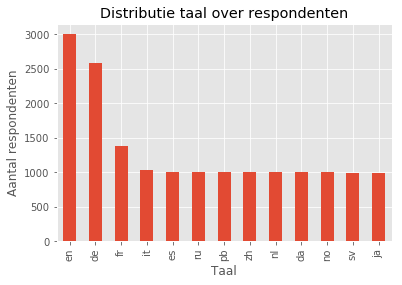

In [38]:
plt_df = df[["Respondent","Taal"]].groupby("Taal").Respondent.nunique()
plt_df = plt_df.sort_values(ascending =False)

# Strings
xlab = 'Taal Respondent'
ylab = 'Aantal respondenten'
title = 'Distributie taal over respondenten'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
plt_df.plot.bar();
    
# Render plot
plt.show()

## Datum geantwoord

In [39]:
plt_df = df[["Taal", "Datum geantwoord"]].copy()
plt_df['count'] = 1;
plt_df = plt_df.sort_values(by="Datum geantwoord")
plt_df['cumcount'] = plt_df.groupby(by=["Taal"]).cumsum()

plt_df = plt_df.drop(['count'], axis =1)


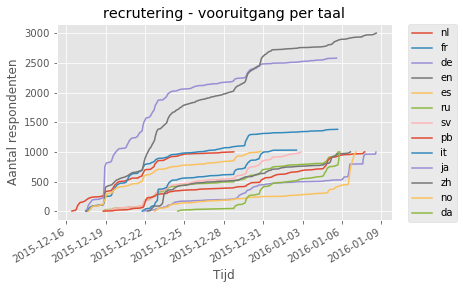

In [40]:
# build plot language per language

for lan in plt_df.Taal.unique():
    x=plt_df.loc[plt_df.Taal == lan, ['Datum geantwoord']]
    y=plt_df.loc[plt_df.Taal == lan, ['cumcount']]
    plt.plot (x, y, label=lan)

# Strings
xlab = 'Tijd'
ylab = 'Aantal respondenten'
title = 'recrutering - vooruitgang per taal'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().autofmt_xdate()
# Render plot
plt.show()
    

# Einde bereikt

In [41]:
print(df["Einde bereikt"].unique())

[1]


# Invultijd

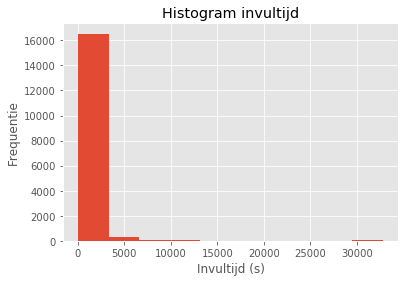

In [42]:
df["Invultijd (seconden)"].plot.hist()

# Strings
xlab = 'Invultijd (s)'
ylab = 'Frequentie'
title = 'Histogram invultijd'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Render plot
plt.show()

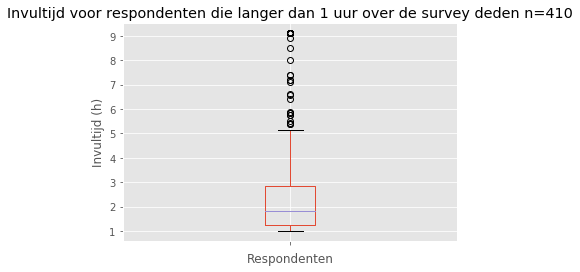

In [43]:
df_plot = (df.loc[df["Invultijd (seconden)"]> 3600, "Invultijd (seconden)"]/3600)
df_plot = df_plot.rename("")
df_plot.plot.box()

# Strings
xlab = 'Respondenten'
ylab = 'Invultijd (h)'
title = "Invultijd voor respondenten die langer dan 1 uur over de survey deden n=" + str(df_plot.size)

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Render plot
plt.show()

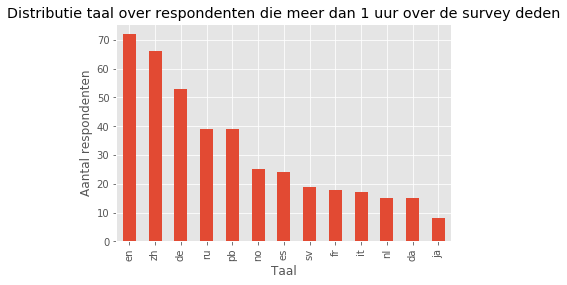

Taal
en    72
zh    66
de    53
ru    39
pb    39
no    25
es    24
sv    19
fr    18
it    17
nl    15
da    15
ja     8
Name: Respondent, dtype: int64

In [44]:
plt_df = df.loc[df["Invultijd (seconden)"]> 3600, ["Respondent","Taal"]].groupby("Taal").Respondent.nunique()
plt_df = plt_df.sort_values(ascending =False)

# Strings
xlab = 'Taal Respondent'
ylab = 'Aantal respondenten'
title = 'Distributie taal over respondenten die meer dan 1 uur over de survey deden'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
plt_df.plot.bar();
    
# Render plot
plt.show()
plt_df

In [45]:
df_rel = (df.loc[df["Invultijd (seconden)"] > 3600,["Respondent","Taal"]].groupby("Taal").Respondent.count() * 100/
 df[["Respondent","Taal"]].groupby("Taal").Respondent.count())
df_rel = df_rel.sort_values(ascending =False)
df_rel

Taal
zh    6.600000
ru    3.896104
pb    3.896104
no    2.502503
en    2.396804
es    2.380952
de    2.052672
sv    1.905717
it    1.650485
nl    1.500000
da    1.500000
fr    1.303403
ja    0.802407
Name: Respondent, dtype: float64

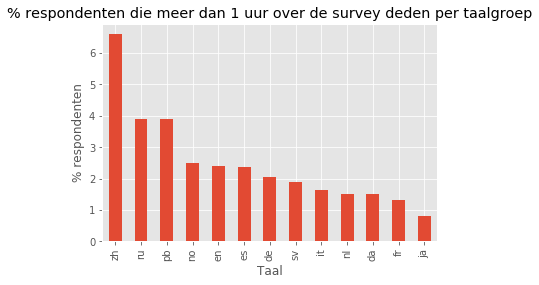

In [46]:

# Strings
xlab = 'Taal Respondent'
ylab = '% respondenten'
title = '% respondenten die meer dan 1 uur over de survey deden per taalgroep'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
df_rel.plot.bar();
    
# Render plot
plt.show()

## Clustering

### dimension selection

In [64]:
df.dtypes

Respondent                                                                                                    int64
Taal                                                                                                       category
Datum geantwoord                                                                                     datetime64[ns]
Distributiemethode                                                                                         category
Einde bereikt                                                                                                 int64
Invultijd (seconden)                                                                                          int64
Browser                                                                                                    category
Besturingssysteem                                                                                          category
IP                                                                      

In [173]:
def reshapeAndPad (dataframe, cols):
    a=np.array(dataframe.columns)
    padding = np.array([""]* (cols - (a.size % cols)))
    a=np.concatenate ((a, padding))
    return pd.DataFrame(a.reshape(a.size//cols, cols))



cdf = df.select_dtypes(include=['bool',  'int64', 'float64'])
# 'category',

### Exclude the following features in clustering

In [174]:
xdf = df.drop(cdf, axis=1)
reshapeAndPad(xdf, 5)

,0,1,2,3,4
0,Taal,Datum geantwoord,Distributiemethode,Browser,Besturingssysteem
1,IP,Locatie (via IP),Verwijzende sites,1. ID,2. Country
2,"6.12. Ander, gelieve te specificeren",8.1. Reisprogramma's op tv/radio,8.2. Websites van (online) touroperators / rei...,8.3. Websites waarop consumenten reiservaringe...,8.4. Websites met beoordelingen/reviews van re...
3,8.5. Reismagazines,"8.6. Vrienden, familie en kennissen",8.7. Reisbijlages/ - artikelen in kranten,8.8. Cultuurmagazines,8.9. Officiële website van toeristische organi...
4,8.10. Sociale media,"9.18. Ander, gelieve te specificeren",10.1. In eigen land,10.2. In buitenland,"13. Als u op reis bent naar het buitenland, be..."
5,"14.4. Kerken, kathedralen",15.1. 1,15.2. 2,15.3. 3,15.4. 4
6,15.5. 5,17. Wie is de schilder?,19. Wie is de schilder?,21. Wie is de schilder?,23. Wie is de schilder?
7,24.17. Vlaamse Primitieven,24.18. Geen van bovenstaande,26.1. Een museum met een focus op topwerken bo...,"26.2. Inspiratieplekken (landschap, leefomgevi...",26.3. Ik bezoek enkel een museum met de collec...
8,26.4. Interpretaties van oude werken door hede...,"26.5. Een beleving (themawandeling, doe-activi...",28. Omschrijf met een aantal kernwoorden wat u...,29.1. 1,29.2. 2
9,29.3. 3,31.1. Pieter Paul Rubens,31.2. Jan van Eyck (Lam Gods),31.3. Pieter Bruegel de Oude,32. Zou u een citytrip naar Brussel/Vlaanderen...


### Include the following features in clustering

In [175]:
reshapeAndPad(cdf, 5)

,0,1,2,3,4
0,Respondent,Einde bereikt,Invultijd (seconden),3. Study number,4. Wat is uw geboortejaar?
1,5. Bent u in de afgelopen 3 jaar wel eens voor...,6.1. Strandvakantie,6.2. Stedentrip,6.3. Wintersportvakantie,6.4. Wandelvakantie
2,6.5. Fietsvakantie,6.6. Wellnessvakantie,6.7. Gastronomische of culinaire vakantie,6.8. Vakantie in het groen met (af en toe) uit...,6.9. Rondreis
3,6.10. Cruise,6.11. Culturele reis,6.13. Geen van bovenstaande,7.1. Afstand,7.2. Historisch erfgoed
4,7.3. Eten,7.4. Cultuur,7.5. Natuur,7.6. Prijs,7.7. Kust
5,7.8. Sport,"7.9. Festival, evenement of tentoonstelling",7.10. Kunst,7.11. Variatie aan activiteiten,9.1. Facebook
6,9.2. Twitter,9.3. Youtube,9.4. Pinterest,9.5. Instagram,9.6. LinkedIn
7,9.7. Google+,9.8. Flickr,9.9. Tumblr,9.10. Vine,9.11. Snapchat
8,9.12. Whatsapp,9.13. Foursquare,9.14. Orkut,9.15. Weibo,9.16. We Chat
9,9.17. VKontakte,9.19. Ik gebruik geen sociale media,11.1. Museum voor oude of schone kunsten,11.2. Museum voor hedendaagse of actuele kunst,"11.3. Museum voor natuurkunde, technologie of ..."


### Dendogram

In [176]:
## intuition - create clusters to create classes.  fit a decision tree to the classes to come up with a descripton

from scipy.cluster.hierarchy import dendrogram, linkage


In [178]:
# issue - categorical variables need to be converted to continuous variables.  either int for ordered categories, one-hot encoding
# http://scikit-learn.org/stable/modules/preprocessing.html
Z = linkage (cdf, method='single', metric='jaccard')


In [181]:
Z[:20]

array([[  4.88900000e+03,   9.19600000e+03,   6.86274510e-02,
          2.00000000e+00],
       [  8.84300000e+03,   1.70000000e+04,   6.86274510e-02,
          3.00000000e+00],
       [  1.17630000e+04,   1.17640000e+04,   6.89655172e-02,
          2.00000000e+00],
       [  3.35000000e+03,   4.62500000e+03,   7.69230769e-02,
          2.00000000e+00],
       [  7.23400000e+03,   1.70010000e+04,   9.52380952e-02,
          4.00000000e+00],
       [  9.54600000e+03,   1.70040000e+04,   9.70873786e-02,
          5.00000000e+00],
       [  1.44230000e+04,   1.44240000e+04,   1.00000000e-01,
          2.00000000e+00],
       [  1.08130000e+04,   1.70050000e+04,   1.03773585e-01,
          6.00000000e+00],
       [  1.47510000e+04,   1.48930000e+04,   1.10000000e-01,
          2.00000000e+00],
       [  3.67300000e+03,   1.70070000e+04,   1.14285714e-01,
          7.00000000e+00],
       [  1.00400000e+04,   1.70090000e+04,   1.23809524e-01,
          8.00000000e+00],
       [  8.45200000e

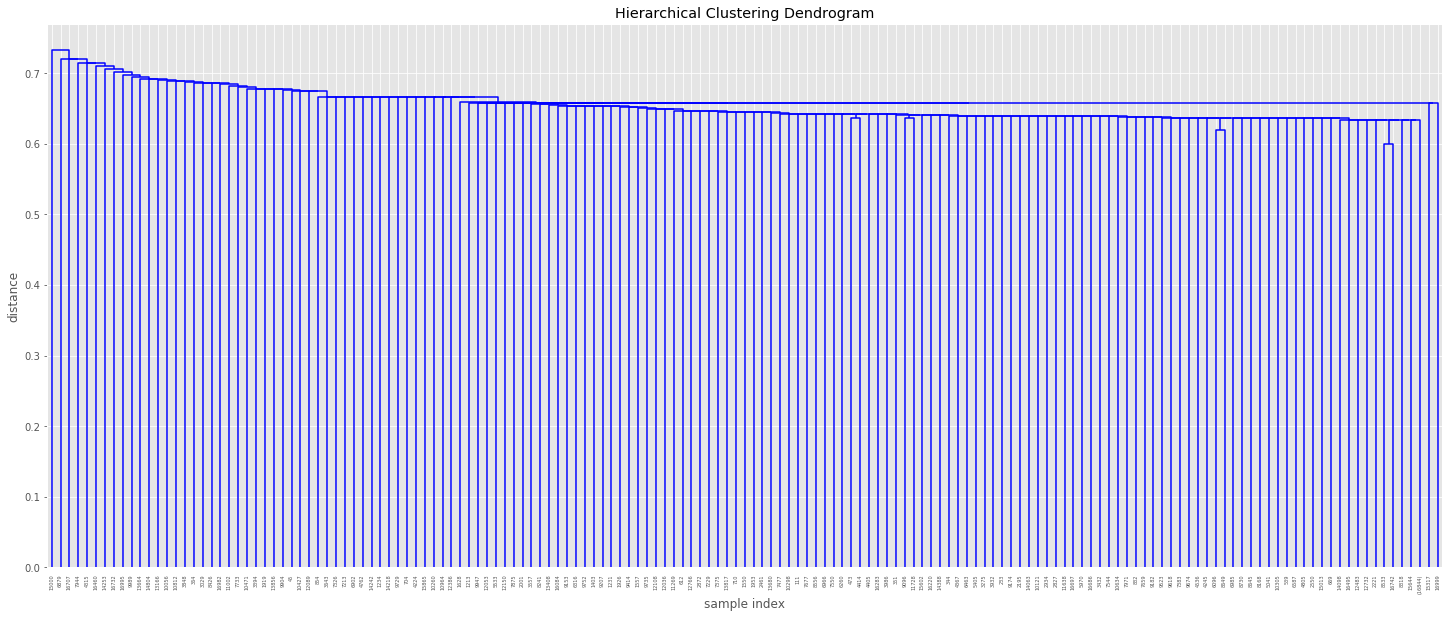

In [186]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, truncate_mode = 'level', p=150)
plt.show()